In [1]:
import os
os.getcwd()
os.chdir('/Users/michaelbostwick/Documents/COMP_790/health_yelp/')

import pandas as pd
import numpy as np

reviews = pd.read_csv('reviews.csv')
reviews.head()

,Unnamed: 0,restaurant_id,date,stars,text
0,0,N6Ok7qOx,2005-08-26,3,This is a pretty typical cafe. The sandwiches...
1,1,N6Ok7qOx,2005-11-23,3,I agree with other reviewers - this is a prett...
2,2,N6Ok7qOx,2005-11-23,3,"Decent enough food, but very overpriced. Just ..."
3,3,N6Ok7qOx,2006-02-24,5,The muffins are great...esp the blueberry! I ...
4,4,N6Ok7qOx,2007-09-06,3,"Well, well, well, look at me reviewing the res..."


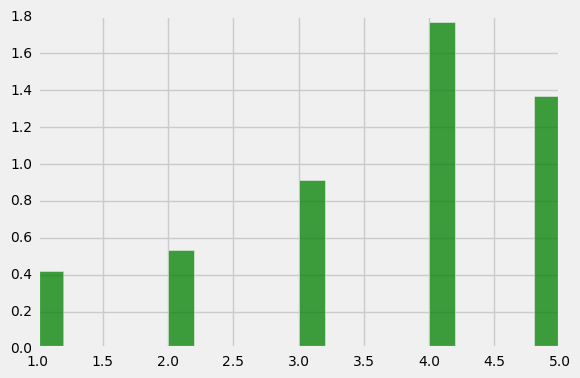

In [2]:
from matplotlib import pyplot as plt

with plt.style.context('fivethirtyeight'):
    plt.hist(reviews.stars, 20, normed = 1, facecolor='green', alpha=0.75)
    
plt.show()


In [2]:
violations = pd.read_csv("data/AllViolations.csv")
violations.head()

,Unnamed: 0,date,restaurant_id,*,**,***
0,20619,2006-04-04,6VOp6a3L,7,0,2
1,10144,2006-10-04,1JEbP4oR,0,0,0
2,19634,2006-10-16,Pk3w02od,6,1,2
3,24797,2006-10-19,1JEbP4oR,0,0,0
4,20253,2006-11-17,N6OkmQ3x,0,0,0


In [3]:
viol_sorted = violations.sort_values(['restaurant_id', 'date'])
viol_sorted.head(10)
#violations_sorted.tail()

,Unnamed: 0,date,restaurant_id,*,**,***
1338,28144,2007-09-21,0ZED0WED,3,1,0
1392,27691,2007-09-28,0ZED0WED,3,1,0
3390,24765,2008-03-26,0ZED0WED,3,1,0
3472,31333,2008-04-02,0ZED0WED,3,1,0
5600,25193,2008-10-08,0ZED0WED,6,2,4
5689,14328,2008-10-15,0ZED0WED,6,2,4
7477,12775,2009-03-03,0ZED0WED,3,0,0
7575,7253,2009-03-10,0ZED0WED,3,0,0
9217,25850,2009-07-23,0ZED0WED,1,0,2
9304,15277,2009-07-30,0ZED0WED,1,0,2


In [4]:
viol_sorted['prev_date_temp'] = viol_sorted.date.shift(1)
viol_sorted['prev_rest'] = viol_sorted.restaurant_id.shift(1)
viol_sorted['prev_date'] = np.where(viol_sorted.prev_rest == viol_sorted.restaurant_id, viol_sorted.prev_date_temp, np.nan)         
viol_sorted.prev_date = viol_sorted.prev_date.fillna('2000-01-01')
viol_sorted.drop(['prev_date_temp', 'prev_rest'], inplace = True, axis = 1)
#viol_sorted.head(100)   



In [6]:
viol_per_rest = violations.groupby(['restaurant_id']).count()
viol_per_rest.head()

,Unnamed: 0,date,*,**,***
restaurant_id,,,,,
0ZED0WED,32,32,32,32,32
0ZED1B3D,18,18,18,18,18
0ZED4ED9,10,10,10,10,10
0ZED4pED,23,23,23,23,23
0ZED543D,9,9,9,9,9


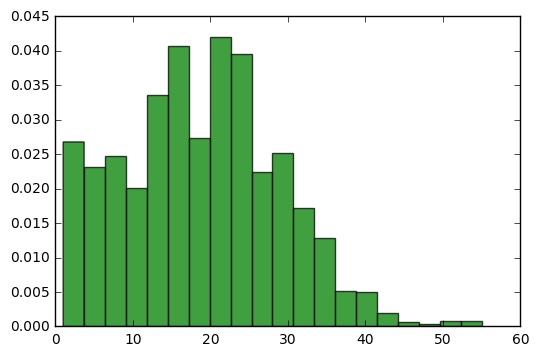

In [8]:
plt.hist(viol_per_rest.date, 20, normed = 1, facecolor='green', alpha=0.75)    
plt.show()

In [7]:
df = pd.merge(viol_sorted, reviews, how='left', left_on='restaurant_id', right_on='restaurant_id')
df = df[(df['date_y']>=df['prev_date']) & (df['date_y']<=df['date_x'])]
df['pos_text'] = np.where(df.stars > 3, df.text, '')
df['neg_text'] = np.where(df.stars > 3, '', df.text)
df_sorted = df.sort_values(['restaurant_id', 'date_x'])
df_sorted.head(20)


,Unnamed: 0_x,date_x,restaurant_id,*,**,***,prev_date,Unnamed: 0_y,date_y,stars,text,pos_text,neg_text
0,28144,2007-09-21,0ZED0WED,3,1,0,2000-01-01,69341,2005-07-06,4,This pizza places delivers to an area of Dorch...,This pizza places delivers to an area of Dorch...,
1,28144,2007-09-21,0ZED0WED,3,1,0,2000-01-01,69342,2006-01-26,3,"Lunch special is a large sub, drink, and fries...",,"Lunch special is a large sub, drink, and fries..."
2,28144,2007-09-21,0ZED0WED,3,1,0,2000-01-01,69343,2007-05-11,5,"This is my ""Go To"" place when having food deli...","This is my ""Go To"" place when having food deli...",
3,28144,2007-09-21,0ZED0WED,3,1,0,2000-01-01,69344,2007-05-25,4,"Nice little operation, here. \n\nFirst, their...","Nice little operation, here. \n\nFirst, their...",
4,28144,2007-09-21,0ZED0WED,3,1,0,2000-01-01,69345,2007-06-18,4,"I hate to admit it, but I love me some greasy ...","I hate to admit it, but I love me some greasy ...",
5,28144,2007-09-21,0ZED0WED,3,1,0,2000-01-01,69346,2007-06-26,4,This is our favorite pizza delivery place in D...,This is our favorite pizza delivery place in D...,
140,24765,2008-03-26,0ZED0WED,3,1,0,2007-09-28,69347,2008-01-05,3,This place is great. I'm back in town for a co...,,This place is great. I'm back in town for a co...
409,12775,2009-03-03,0ZED0WED,3,0,0,2008-10-15,69348,2008-11-10,5,probably has the best buffalo chicken calzone ...,probably has the best buffalo chicken calzone ...,
410,12775,2009-03-03,0ZED0WED,3,0,0,2008-10-15,69349,2008-12-02,4,"The Buffalo Chicken here is bomb, in any form:...","The Buffalo Chicken here is bomb, in any form:...",
411,12775,2009-03-03,0ZED0WED,3,0,0,2008-10-15,69350,2009-02-05,4,Best\nChicken\nEver\n\nYou can order from the ...,Best\nChicken\nEver\n\nYou can order from the ...,


In [80]:
type(df_sorted.neg_text[0])

str

In [8]:
pos_data = pd.DataFrame(df_sorted.groupby(['restaurant_id', 'date_x'])['pos_text'].apply(lambda x: "%s" % ' '.join(x)))
neg_data = pd.DataFrame(df_sorted.groupby(['restaurant_id', 'date_x'])['neg_text'].apply(lambda x: "%s" % ' '.join(x)))
agg_data = pd.merge(pos_data, neg_data, how='outer', left_index=True, right_index=True)
agg_data.head(20)

pos_text  \
restaurant_id date_x                                                          
0ZED0WED      2007-09-21  This pizza places delivers to an area of Dorch...   
              2008-03-26                                                      
              2009-03-03  probably has the best buffalo chicken calzone ...   
              2009-07-23  I am a firm believer that Windy City has the b...   
              2009-12-02  Windy City has the best buffalo wings in town....   
              2011-10-14   The WINGS!, the gosh darn WINGS! You cant res...   
              2011-12-28  Ah WIndy City, the heart attack you'll give me...   
              2012-03-21   Windy City and I go way back. It's where my l...   
              2012-08-27   Picked up a small Buffalo Chicken pizza for l...   
              2012-09-07  Best buffalo chicken anywhere.  Grew up nearby...   
              2012-12-30                                                      
              2013-07-26      Typical neighborhood pizza shop. Wings, st...   
              2014-01-08  The pizza here was delicious and the crust was...   
              2014-10-08  Best pizza place in Dorchester! Their subs are...   
              2014-12-23  A little place that makes great pizzas!\n\nI a...   
              2015-05-13  Great pizza - cheese/buffalo chicken. Great si...   
              2015-05-26  They're always so nice to me. Love them! Great...   
0ZED1B3D      2009-04-23  Lansdowne Street is shedding its old skin one ...   
              2009-10-30  Lansdowne Street is shedding its old skin one ...   
              2010-01-29   This is what all Boston Bars should be but al...   

                                                                   neg_text  
restaurant_id date_x                                                         
0ZED0WED      2007-09-21   Lunch special is a large sub, drink, and frie...  
              2008-03-26  This place is great. I'm back in town for a co...  
              2009-03-03                                                     
              2009-07-23     If you are looking for the perfect neighbor...  
              2009-12-02     This isn't the best pizza BUTTTTT I do enjo...  
              2011-10-14  My rating is actually 3.5 stars out of 5. Have...  
              2011-12-28                                                     
              2012-03-21  I've always liked the food from here, and have...  
              2012-08-27  Pretty disappointed with the food here. The ch...  
              2012-09-07                                                     
              2012-12-30  Used to be better. Maybe new management steppe...  
              2013-07-26  Ordered from this place over the weekend. \nI ...  
              2014-01-08   Fast service, better than unchained and the s...  
              2014-10-08    This place is okay. They'll give you your mo...  
              2014-12-23   Got this delivered on Sunday during the Patri...  
              2015-05-13   The women behind the counter are ridiculously...  
              2015-05-26                                                     
0ZED1B3D      2009-04-23                                                     
              2009-10-30   Went there on opening night 4/24/09. Across t...  
              2010-01-29  nice place, big enough so it doesn't get too c...

In [15]:
analysis_data = pd.merge(viol_sorted, agg_data, how='left', left_on=['restaurant_id', 'date'], right_index=True)


analysis_data['pos_text_temp'] = analysis_data.pos_text.shift(1)
analysis_data['neg_text_temp'] = analysis_data.neg_text.shift(1)
analysis_data.pos_text = np.where(pd.isnull(analysis_data.pos_text), analysis_data.pos_text_temp, analysis_data.pos_text)
analysis_data.neg_text = np.where(pd.isnull(analysis_data.neg_text), analysis_data.neg_text_temp, analysis_data.neg_text)
analysis_data.drop(['Unnamed: 0', 'pos_text_temp', 'neg_text_temp'], inplace = True, axis = 1)

analysis_data.head(10)
analysis_data.to_csv('data/analysis_data.csv')